# Taylor series of $e^x$

$$ 
\begin{array}{lll}
e^{ x}  & =  & \sum_{i=0}^{\infty} \frac{x^i}{i!} \\
        & = & 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} +\cdots+ \frac{x^n}{n!} + \cdots  \\
       & = & 1 + x + \frac{x^2}{2!} +  \frac{x^3}{3!}  \cdots+ \frac{x^n}{n!} + O(x^{n+1}) 
\end{array} 
$$


Approximation 
$$ e^{ x}  \approx 1 + x + \frac{x^2}{2!} + + \frac{x^3}{3!}  + \cdots+ \frac{x^n}{n!}$$


Interact code in Sagemath for $e^x$

```python
# Interact Taylor Series of $$f(x) = e^x$$
# Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = e^(x)
p   = plot(f, -20, 20, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -20, 20, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-1, ymax=10)
```

Animate code in Sagemath for $e^x$
```python
# Animate  Taylor Series of $$f(x) = e^x$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = e^(x)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = e^x')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -3,3, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('e_to_x_taylor_animation_1.gif')
```

 ![Taylor gif](https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_x_taylor_animation_1.gif)

 ![Taylor gif](https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_x_taylor_animation_2.gif)

#What is value of the partial Taylor series of $e^x$ up to the  $10$-th term of $e^x$ about $0$ (Maclaurin  series) for $x=2$

$$ e^{ x} \approx \sum_{i=1}^{n} \frac{x^i}{i!}  = 1 + x + \frac{x^2}{2!}+\cdots+ \frac{x^n}{n!}$$

In [ ]:
# ∑_{i=0}^n  x^i/i

import math

n = 10
x = 2
e_to_x = 0

for i in range(n+1):
    e_to_x += x**i/math.factorial(i) 
    print(i, 'e_to_x ≈ ∑_{i=0}^'+str(i),'x^i/i! =',e_to_x)  
    
print('math.exp(x) = ',math.exp(x))

0 e_to_x ≈ ∑_{i=0}^0 x^i/i! = 1.0
1 e_to_x ≈ ∑_{i=0}^1 x^i/i! = 3.0
2 e_to_x ≈ ∑_{i=0}^2 x^i/i! = 5.0
3 e_to_x ≈ ∑_{i=0}^3 x^i/i! = 6.333333333333333
4 e_to_x ≈ ∑_{i=0}^4 x^i/i! = 7.0
5 e_to_x ≈ ∑_{i=0}^5 x^i/i! = 7.266666666666667
6 e_to_x ≈ ∑_{i=0}^6 x^i/i! = 7.355555555555555
7 e_to_x ≈ ∑_{i=0}^7 x^i/i! = 7.3809523809523805
8 e_to_x ≈ ∑_{i=0}^8 x^i/i! = 7.387301587301587
9 e_to_x ≈ ∑_{i=0}^9 x^i/i! = 7.3887125220458545
10 e_to_x ≈ ∑_{i=0}^10 x^i/i! = 7.388994708994708
math.exp(x) =  7.38905609893065


# What is the minimun $n$ for which the error between the Taylor series for $e^x$ about $0$ (Maclaurin  series) for $x$ and *math.exp(x)*, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\sum_{i=0}^{n} \frac{x^i}{i!} - math.exp(x) \right| < \epsilon$$

In [ ]:
# Returns Min n, |∑_{i=1}^{n}  x^i/i! - math.exp(x)| < epsilon and ∑_{i=0}^{n} x^i/i!   
import math

x = 4
epsilon = 10**(-5)

e_to_x = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(21)," ","delta =x^i/i! ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  x**i / math.factorial(i) 
  e_to_x += delta
  error = abs(math.exp(x) - e_to_x)
  print(format(i, '10'),"  ", format(e_to_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.exp(x) = ',math.exp(x))

         n      ∑_{i=0}^n x^i/i!         delta =x^i/i!           error              epsilon       
         0    1.000000000000000000    1.00000000000000000   53.59815003314423620    1e-05
         1    5.000000000000000000    4.00000000000000000   49.59815003314423620    1e-05
         2    13.000000000000000000    8.00000000000000000   41.59815003314423620    1e-05
         3    23.666666666666664298    10.66666666666666607   30.93148336647757191    1e-05
         4    34.333333333333328596    10.66666666666666607   20.26481669981090761    1e-05
         5    42.866666666666660035    8.53333333333333321   11.73148336647757617    1e-05
         6    48.555555555555550029    5.68888888888888911   6.04259447758868617    1e-05
         7    51.806349206349203484    3.25079365079365079   2.79180082679503272    1e-05
         8    53.431746031746030212    1.62539682539682540   1.16640400139820599    1e-05
         9    54.154144620811287325    0.72239858906525578   0.44400541233294888    1

In [1]:
# Returns Min n, |∑_{i=1}^{n}  x^i/i! - math.exp(x)| < epsilon and ∑_{i=0}^{n} x^i/i!   
import math

x = -4
epsilon = 10**(-5)

e_to_x = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(21)," ","delta =x^i/i! ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0
while  epsilon <= error:
  delta =  x**i / math.factorial(i) 
  e_to_x += delta
  error = abs(math.exp(x) - e_to_x)
  print(format(i, '10'),"  ", format(e_to_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.exp(x) = ',math.exp(x))

         n      ∑_{i=0}^n x^i/i!         delta =x^i/i!           error              epsilon       
         0    1.000000000000000000    1.00000000000000000   0.98168436111126578    1e-05
         1    -3.000000000000000000    -4.00000000000000000   3.01831563888873422    1e-05
         2    5.000000000000000000    8.00000000000000000   4.98168436111126578    1e-05
         3    -5.666666666666666075    -10.66666666666666607   5.68498230555540029    1e-05
         4    5.000000000000000000    10.66666666666666607   4.98168436111126578    1e-05
         5    -3.533333333333333215    -8.53333333333333321   3.55164897222206744    1e-05
         6    2.155555555555555891    5.68888888888888911   2.13723991666682167    1e-05
         7    -1.095238095238094900    -3.25079365079365079   1.11355373412682912    1e-05
         8    0.530158730158730496    1.62539682539682540   0.51184309126999628    1e-05
         9    -0.192239858906525285    -0.72239858906525578   0.21055549779525945    1e-05

# What is the minimun $n$ for which the $n$-th term of the Taylor series for $e^x$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\frac{x^{n}}{n!}\right| < \epsilon$$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = 1
epsilon = 10**(-5)

e_to_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    2.00000000000000000    1.00000000000000000    1e-05
         2    2.50000000000000000    0.50000000000000000    1e-05
         3    2.66666666666666652    0.16666666666666666    1e-05
         4    2.70833333333333304    0.04166666666666666    1e-05
         5    2.71666666666666634    0.00833333333333333    1e-05
         6    2.71805555555555545    0.00138888888888889    1e-05
         7    2.71825396825396837    0.00019841269841270    1e-05
         8    2.71827876984127004    0.00002480158730159    1e-05
         9    2.71828152557319225    0.00000275573192240    1e-05
n =  9
x =  1
e_to_x ≈ ∑_{i=0}^9 x^i/i! = 2.7182815255731922
epsilon = 1e-05
math.exp(x) =  2.718281828459045


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = -1
epsilon = 10**(-5)

e_to_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    0.00000000000000000    -1.00000000000000000    1e-05
         2    0.50000000000000000    0.50000000000000000    1e-05
         3    0.33333333333333337    -0.16666666666666666    1e-05
         4    0.37500000000000006    0.04166666666666666    1e-05
         5    0.36666666666666670    -0.00833333333333333    1e-05
         6    0.36805555555555558    0.00138888888888889    1e-05
         7    0.36785714285714288    -0.00019841269841270    1e-05
         8    0.36788194444444450    0.00002480158730159    1e-05
         9    0.36787918871252212    -0.00000275573192240    1e-05
n =  9
x =  -1
e_to_x ≈ ∑_{i=0}^9 x^i/i! = 0.3678791887125221
epsilon = 1e-05
math.exp(x) =  0.36787944117144233


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = 4
epsilon = 10**(-5)

e_to_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," deltax^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!          deltax^n/n!        epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    5.00000000000000000    4.00000000000000000    1e-05
         2    13.00000000000000000    8.00000000000000000    1e-05
         3    23.66666666666666430    10.66666666666666607    1e-05
         4    34.33333333333332860    10.66666666666666607    1e-05
         5    42.86666666666666003    8.53333333333333321    1e-05
         6    48.55555555555555003    5.68888888888888911    1e-05
         7    51.80634920634920348    3.25079365079365079    1e-05
         8    53.43174603174603021    1.62539682539682540    1e-05
         9    54.15414462081128733    0.72239858906525578    1e-05
        10    54.44310405643739159    0.28895943562610227    1e-05
        11    54.54818021484688018    0.10507615840949175    1e-05
        12    54.58320560098337637    0.03502538613649725    1e-05
        13    54.59398264287153069    0.01077704188815300   

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = -4
epsilon = 10**(-5)

e_to_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    -3.00000000000000000    -4.00000000000000000    1e-05
         2    5.00000000000000000    8.00000000000000000    1e-05
         3    -5.66666666666666607    -10.66666666666666607    1e-05
         4    5.00000000000000000    10.66666666666666607    1e-05
         5    -3.53333333333333321    -8.53333333333333321    1e-05
         6    2.15555555555555589    5.68888888888888911    1e-05
         7    -1.09523809523809490    -3.25079365079365079    1e-05
         8    0.53015873015873050    1.62539682539682540    1e-05
         9    -0.19223985890652528    -0.72239858906525578    1e-05
        10    0.09671957671957698    0.28895943562610227    1e-05
        11    -0.00835658168991477    -0.10507615840949175    1e-05
        12    0.02666880444658248    0.03502538613649725    1e-05
        13    0.01589176255842949    -0.01077704188815300  

# For  $x$ negative  and less than  $-9$ at the middle phase of the algorithm there are problems caused by rounding errors due to differences that produce wrong answers.

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = -9
epsilon = 10**(-5)

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    -8.00000000000000000    -9.00000000000000000    1e-05
         2    32.50000000000000000    40.50000000000000000    1e-05
         3    -89.00000000000000000    -121.50000000000000000    1e-05
         4    184.37500000000000000    273.37500000000000000    1e-05
         5    -307.69999999999998863    -492.07499999999998863    1e-05
         6    430.41249999999996589    738.11249999999995453    1e-05
         7    -518.58928571428577925    -949.00178571428568830    1e-05
         8    549.03772321428573377    1067.62700892857151302    1e-05
         9    -518.58928571428577925    -1067.62700892857151302    1e-05
        10    442.27502232142853700    960.86430803571431625    1e-05
        11    -343.88668425324681266    -786.16170657467534966    1e-05
        12    245.73459567775967116    589.62127993100648382    1e-05
        13    -162

In [ ]:
# Returns Min n, |x^{n}/(n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = -10
epsilon = 10**(-5)

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    -9.00000000000000000    -10.00000000000000000    1e-05
         2    41.00000000000000000    50.00000000000000000    1e-05
         3    -125.66666666666665719    -166.66666666666665719    1e-05
         4    291.00000000000000000    416.66666666666668561    1e-05
         5    -542.33333333333337123    -833.33333333333337123    1e-05
         6    846.55555555555554292    1388.88888888888891415    1e-05
         7    -1137.57142857142844150    -1984.12698412698409811    1e-05
         8    1342.58730158730168114    2480.15873015873012264    1e-05
         9    -1413.14462081128749560    -2755.73192239858917674    1e-05
        10    1342.58730158730168114    2755.73192239858917674    1e-05
        11    -1162.62353695687033905    -2505.21083854417202019    1e-05
        12    925.05216182993945040    2087.67569878680978945    1e-05
      

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = -35
epsilon = 10**(-5)

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta =x^n/n!|.center(20)"," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!      delta =x^n/n!|.center(20)    epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    -34.00000000000000000    -35.00000000000000000    1e-05
         2    578.50000000000000000    612.50000000000000000    1e-05
         3    -6567.33333333333303017    -7145.83333333333303017    1e-05
         4    55958.70833333332848269    62526.04166666666424135    1e-05
         5    -381723.58333333337213844    -437682.29166666668606922    1e-05
         6    2171423.11805555550381541    2553146.70138888899236917    1e-05
         7    -10594310.38888888806104660    -12765733.50694444403052330    1e-05
         8    45255773.70399305969476700    55850084.09288194775581360    1e-05
         9    -171938997.76832562685012817    -217194771.47231867909431458    1e-05
        10    588242702.38478970527648926    760181700.15311539173126221    1e-05
        11    -1830517252.64785027503967285    -2418759955.03263998031616211    1e-05
 

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = -43
epsilon = 10**(-5)

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=10}^n x^i/i!".center(20)," "," delta =x^n/n!|.center(20)"," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( abs(delta), '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n    ∑_{i=10}^n x^i/i!      delta =x^n/n!|.center(20)    epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    -42.00000000000000000    43.00000000000000000    1e-05
         2    882.50000000000000000    924.50000000000000000    1e-05
         3    -12368.66666666666606034    13251.16666666666606034    1e-05
         4    130081.37499999998544808    142450.04166666665696539    1e-05
         5    -1094988.98333333339542150    1225070.35833333339542150    1e-05
         6    7684681.91805555578321218    8779670.90138888917863369    1e-05
         7    -46247582.19047618657350540    53932264.10853174328804016    1e-05
         8    243638337.39288192987442017    289885919.58335810899734497    1e-05
         9    -1141372167.28316259384155273    1385010504.67604446411132812    1e-05
        10    4814173002.82382774353027344    5955545170.10699081420898438    1e-05
        11    -18466594480.32168579101562500    23280767483.14551162719726562   

#  Solution for $x$ negative  and less than  $-9$
**Solution** for $e^{-x}$  calculate $e^{x}$ and return $1/e^{x}$

$$e^{-x}  = 1/e^{x}  $$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = - 43
epsilon = 10**(-5)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," ","|x^n/n!|".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( abs(delta), '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!           |x^n/n!|          epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    44.00000000000000000    43.00000000000000000    1e-05
         2    968.50000000000000000    924.50000000000000000    1e-05
         3    14219.66666666666606034    13251.16666666666606034    1e-05
         4    156669.70833333331393078    142450.04166666665696539    1e-05
         5    1381740.06666666665114462    1225070.35833333339542150    1e-05
         6    10161410.96805555559694767    8779670.90138888917863369    1e-05
         7    64093675.07658729702234268    53932264.10853174328804016    1e-05
         8    353979594.65994542837142944    289885919.58335810899734497    1e-05
         9    1738990099.33598995208740234    1385010504.67604446411132812    1e-05
        10    7694535269.44298076629638672    5955545170.10699081420898438    1e-05
        11    30975302752.58849334716796875    23280767483.14551162719726562    1e-05
    

# Efficeincy 
Efficient 

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x

$$ 
\begin{array}{lll}
e^{ x}  & \approx   &\sum_{i=0}^{n} \frac{x^i}{i!}  \\
        & = & 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} +\cdots+ \frac{x^n}{n!}  \\
       & = &1 + \left[ 1  * \frac{x}{1} \right]  + \left[  \left( 1 *  \frac{x}{1} \right)  \frac{x}{2} \right]+ \left[ \left( 1 *  \frac{x}{1} \frac{x}{2} \right) * \frac{x}{3} \right]+ \left[  \left(1 *  \frac{x}{1} \frac{x}{2}   \frac{x}{3}\right) * \frac{x}{4}\right]  +\cdots+ \left[  \left(1 *  \frac{x}{1}  \frac{x}{2} \cdots  \frac{x}{n-1} \right)* \frac{x}{n} \right] \ \ \text{ efficient}
\end{array} 
$$



Additions
$$ n \text{ additions } $$

Multiplications
$$ n \text{ multiplications } $$

Divisions
$$ n \text{ divsions }$$ 

TOTAL 
$$ 3n = \Theta(n) \text{ FLOPS }$$ 

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x


delta = 1
e_to_x = 1
i = 1

while  epsilon <= abs(delta):
  delta *= x/i 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ ∑_{i=0}^1944 x^i/i! = 1.0142320547350058e+304
epsilon = 1e-20
math.exp(x) =  1.0142320547350045e+304
time =  0.0055201053619384766


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = -700
epsilon = 10**(-20)

neg = False
if x < 0 :
  x = abs(x)
  neg = True

delta = 1
e_to_x = 1
i = 1

while  epsilon <= abs(delta):
  delta *= x/i 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ ∑_{i=0}^1944 x^i/i! = 1.0142320547350058e+304
epsilon = 1e-20
math.exp(x) =  1.0142320547350045e+304
time =  0.0014383792877197266


Inefficient

$$ e^{ x} \approx \sum_{i=0}^{n} \frac{x^i}{i!} =\sum_{i=0}^{n} \frac{x**i}{math.factorial(i)}$$

Additions
$$ n \text{ additions } $$

Multiplications

* Powers - exponentiation by squaring
$$ x^i = x**i$$

<center>
<a href="https://en.wikipedia.org/wiki/Exponentiation_by_squaring">https://en.wikipedia.org/wiki/Exponentiation_by_squaring</a>
</center>
$$\lg i \text{ multiplications }$$
<center>
<a href="https://math.stackexchange.com/questions/228744/value-of-summation-of-logn">https://math.stackexchange.com/questions/228744/value-of-summation-of-logn</a>
</center>
$$ \sum_{i=1}^{n}\lg i \approx  n \lg n$$ 


* Factorials
$$math.factorial(i), $$
$$  i-1 \text{ mutiplications }  $$
$$ \sum_{i=1}^{n} i-1 = \frac{n(n-1)}{2} =  \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

Divisions
$$ n-1 \text{ divsions }$$ 

TOTAL 
$$ \frac{1}{2} n^2 + n \lg n + \frac{3}{2} n -1 = \Theta(n^2) \text{ FLOPS }$$ 

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math
import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 0
i = 0
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ ∑_{i=0}^1944 x^i/i! = 1.0142320547350051e+304
epsilon = 1e-20
math.exp(x) =  1.0142320547350045e+304
time =  0.23932409286499023


Inefficient

$$ e^{ x} \approx \sum_{i=0}^{n} \frac{x^i}{i!} =  \sum_{i=1}^{n} \frac{\overset{i\ times}{x*x*\cdots*x}}{1*2*\cdots*i}$$

> Indented block



Additions
$$ n \text{ additions } $$

Multiplications

* Powers
$$ \overset{i\ times}{x*x*\cdots*x}$$
$$i-1 \text{ multiplications }$$
$$ \sum_{i=1}^{n}\ i-1 = \frac{n(n-1)}{2} = \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

* Factorials
$$1*2*\cdots*i$$
$$  i-1 \text{ mutiplications }  $$
$$ \sum_{i=1}^{n} i-1 = \frac{n(n-1)}{2} = \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

Divisions
$$ n-1 \text{ divsions }$$ 

TOTAL 
$$ n^2  + n -1  = \Theta(n^2) \text{ FLOPS }$$ 

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 1
i = 1
while  epsilon <= abs(delta):
  
  x_to_i = 1
  fact_of_i = 1
  for k in range(1,i+1):
      x_to_i *= x
      fact_of_i *= k

  delta = x_to_i/fact_of_i 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ ∑_{i=0}^1944 x^i/i! = 1.0142320547350051e+304
epsilon = 1e-20
math.exp(x) =  1.0142320547350045e+304
time =  2.0453274250030518


# Error using the Lagrange's formula of the Residual $E_n$

* Form: Numerical Analysis Mathematics of Scientific Computing David Kincaid and Ward Cheney and Error estimates in Taylor approximations https://math.dartmouth.edu/~m8s17/ErrorEstimates.pdf

## Lagrange's formula of the Residual
For the Taylor series for $f(x)$

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \text{ for }  \xi \text{ between } c \text{ and } x $$

If you can find a positive real number $M$such that 
$$\left|f^{(n+1)}(\xi)\right|  \le M \text{ for }  \xi \text{ between } c \text{ and } x $$ for all
 then Lagrange’s formula tells you
that
$$ \left| E_n \right| \le  \frac{M}{(n+1)!}
\left|x − c\right|^{(n+1)} $$

For the Taylor series for $f(x) = e^x$ about $c=0$ (Maclaurin) 

* If $x \ge 0$ then $f(n+1)(ξ)= e^ξ < e^x$ for any $0 \le \xi \le x$ then 

$$ \left|E_n \right| =  \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le \left| \frac{e^x}{(n+1)!}x^{(n+1)} \right| $$





<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>

* If $x \le 0$ then $f(n+1)(ξ)= e^ξ < e^0  = 1$ for any $x \le \xi < 0$ then 

$$ \left|E_n =\right| = \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le  \left|\frac{1}{(n+1)!}x^{(n+1)}\right| $$

<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_minus_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>



# What is the minimun $n$ for which the error using absolute value of the Lagrange's formula of the Residual $|E_n|$, of the Taylor series for $e^x$ about $0$ (Maclaurin  series), is less than  $\epsilon$.

$$ \min_{n \in \mathbb{N}}|E_n|  < \epsilon $$

this is

$$\min_{n \in \mathbb{N}}\left\{ \left|\frac{e^x}{(n+1)!}x^{(n+1)} \right| \right\} < \epsilon \text{ if }  x \ge 0$$

and

$$\min_{n \in \mathbb{N}}\left\{  \left|\frac{1}{(n+1)!}x^{(n+1)} \right| \right\} < \epsilon \text{ if }  x < 0$$
 

In [ ]:
# Returns Min n, |Lagrange_Residual_n| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = 4
epsilon = 10**(-5)

e_to_x = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(21)," ","|Lagrange_Residual_n|".center(20)," ","epsilon".center(20))
error = 1
i = 0
while  epsilon <= abs(error):
  e_to_x +=  x**i/math.factorial(i)
  if ( x >= 0 ):
     error = math.exp(x) * x**(i+1)/ math.factorial(i+1) 
  else:
     error = x**(i+1)/ math.factorial(i+1)
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))   
print('math.exp(x) = ',math.exp(x))

         n      ∑_{i=0}^n x^i/i!     |Lagrange_Residual_n|         epsilon       
         0    1.00000000000000000    218.39260013257694482    1e-05
         1    5.00000000000000000    436.78520026515388963    1e-05
         2    13.00000000000000000    582.38026702020522407    1e-05
         3    23.66666666666666430    582.38026702020522407    1e-05
         4    34.33333333333332860    465.90421361616415652    1e-05
         5    42.86666666666666003    310.60280907744277101    1e-05
         6    48.55555555555555003    177.48731947282442434    1e-05
         7    51.80634920634920348    88.74365973641221217    1e-05
         8    53.43174603174603021    39.44162654951654190    1e-05
         9    54.15414462081128733    15.77665061980661676    1e-05
        10    54.44310405643739159    5.73696386174786088    1e-05
        11    54.54818021484688018    1.91232128724928696    1e-05
        12    54.58320560098337637    0.58840654992285746    1e-05
        13    54.593982642871530

In [ ]:
# Returns Min n, |Lagrange Residual| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x  = -4
epsilon = 10**(-5)

e_to_x = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(21)," ","|Lagrange_Residual_n|".center(20)," ","epsilon".center(20))
error = 1
i = 0
while  epsilon <= abs(error):
  e_to_x +=  x**i/math.factorial(i)
  if ( x >= 0 ):
     error = math.exp(x) * x**(i+1)/ math.factorial(i+1) 
  else:
     error = x**(i+1)/ math.factorial(i+1)
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))   
print('math.exp(x) = ',math.exp(x))

         n      ∑_{i=0}^n x^i/i!     |Lagrange_Residual_n|         epsilon       
         0    1.00000000000000000    -4.00000000000000000    1e-05
         1    -3.00000000000000000    8.00000000000000000    1e-05
         2    5.00000000000000000    -10.66666666666666607    1e-05
         3    -5.66666666666666607    10.66666666666666607    1e-05
         4    5.00000000000000000    -8.53333333333333321    1e-05
         5    -3.53333333333333321    5.68888888888888911    1e-05
         6    2.15555555555555589    -3.25079365079365079    1e-05
         7    -1.09523809523809490    1.62539682539682540    1e-05
         8    0.53015873015873050    -0.72239858906525578    1e-05
         9    -0.19223985890652528    0.28895943562610227    1e-05
        10    0.09671957671957698    -0.10507615840949175    1e-05
        11    -0.00835658168991477    0.03502538613649725    1e-05
        12    0.02666880444658248    -0.01077704188815300    1e-05
        13    0.01589176255842949    0.003079

#  Sympy

Taylor Series Expansion with Python from Data Science Fabric

https://dsfabric.org/taylor-series-expansion-with-python

In [ ]:
from sympy import series, Symbol, pi, E, N
from sympy.functions import exp
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [ ]:
# Define symbol
x = Symbol('x')

In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n)

In [ ]:
print('e(x)  ≅')
taylor(exp(x), 0, 8)

e(x)  ≅


1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + x**6/720 + x**7/5040 + O(x**8)

In [ ]:
print('e(x) ≅', taylor(exp(x), 0, 8))

e(x) ≅ 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + x**6/720 + x**7/5040 + O(x**8)


In [ ]:
print('e(x) ≅ at around 1')
taylor(exp(x), 1, 8)

e(x) ≅ at around 1


E + E*(x - 1) + E*(x - 1)**2/2 + E*(x - 1)**3/6 + E*(x - 1)**4/24 + E*(x - 1)**5/120 + E*(x - 1)**6/720 + E*(x - 1)**7/5040 + O((x - 1)**8, (x, 1))

In [ ]:
print('e(1) =', taylor(exp(x), 0, 4).subs(x,1))

e(1) = O(1)


In [ ]:
print('e(1) =', N(taylor(exp(x), 0, 4).subs(x,1)))

e(1) = O(1)


In [ ]:
print('Taylor 0 exp(x) ≅', taylor(exp(x), 0, 0))
print('Taylor 1 exp(x) ≅', taylor(exp(x), 0, 1))
print('Taylor 2 exp(x) ≅', taylor(exp(x), 0, 2))
print('Taylor 3 exp(x) ≅', taylor(exp(x), 0, 3))
print('Taylor 4 exp(x) ≅', taylor(exp(x), 0, 4))
print('Taylor 5 exp(x) ≅', taylor(exp(x), 0, 5))
print('Taylor 6 exp(x) ≅', taylor(exp(x), 0, 6))
print('Taylor 7 exp(x) ≅', taylor(exp(x), 0, 7))
print('Taylor 8 exp(x) ≅', taylor(exp(x), 0, 8))

Taylor 0 exp(x) ≅ O(1)
Taylor 1 exp(x) ≅ 1 + O(x)
Taylor 2 exp(x) ≅ 1 + x + O(x**2)
Taylor 3 exp(x) ≅ 1 + x + x**2/2 + O(x**3)
Taylor 4 exp(x) ≅ 1 + x + x**2/2 + x**3/6 + O(x**4)
Taylor 5 exp(x) ≅ 1 + x + x**2/2 + x**3/6 + x**4/24 + O(x**5)
Taylor 6 exp(x) ≅ 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)
Taylor 7 exp(x) ≅ 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + x**6/720 + O(x**7)
Taylor 8 exp(x) ≅ 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + x**6/720 + x**7/5040 + O(x**8)


In [ ]:
print('Taylor 0 exp(x) ≅', taylor(exp(x), 0, 0).subs(x,1))
print('Taylor 1 exp(x) ≅', taylor(exp(x), 0, 1).subs(x,1))
print('Taylor 2 exp(x) ≅', taylor(exp(x), 0, 2).subs(x,1))
print('Taylor 3 exp(x) ≅', taylor(exp(x), 0, 3).subs(x,1))
print('Taylor 4 exp(x) ≅', taylor(exp(x), 0, 4).subs(x,1))
print('Taylor 5 exp(x) ≅', taylor(exp(x), 0, 5).subs(x,1))
print('Taylor 6 exp(x) ≅', taylor(exp(x), 0, 6).subs(x,1))
print('Taylor 7 exp(x) ≅', taylor(exp(x), 0, 7).subs(x,1))
print('Taylor 8 exp(x) ≅', taylor(exp(x), 0, 8).subs(x,1))

Taylor 0 exp(x) ≅ O(1)
Taylor 1 exp(x) ≅ O(1)
Taylor 2 exp(x) ≅ O(1)
Taylor 3 exp(x) ≅ O(1)
Taylor 4 exp(x) ≅ O(1)
Taylor 5 exp(x) ≅ O(1)
Taylor 6 exp(x) ≅ O(1)
Taylor 7 exp(x) ≅ O(1)
Taylor 8 exp(x) ≅ O(1)


In [ ]:
print('Taylor 0 exp(x) ≅', N(taylor(exp(x), 0, 0).subs(x,1)))
print('Taylor 1 exp(x) ≅', N(taylor(exp(x), 0, 1).subs(x,1)))
print('Taylor 2 exp(x) ≅', N(taylor(exp(x), 0, 2).subs(x,1)))
print('Taylor 3 exp(x) ≅', N(taylor(exp(x), 0, 3).subs(x,1)))
print('Taylor 4 exp(x) ≅', N(taylor(exp(x), 0, 4).subs(x,1)))
print('Taylor 5 exp(x) ≅', N(taylor(exp(x), 0, 5).subs(x,1)))
print('Taylor 6 exp(x) ≅', N(taylor(exp(x), 0, 6).subs(x,1)))
print('Taylor 7 exp(x) ≅', N(taylor(exp(x), 0, 7).subs(x,1)))
print('Taylor 8 exp(x) ≅', N(taylor(exp(x), 0, 8).subs(x,1)))

Taylor 0 exp(x) ≅ O(1)
Taylor 1 exp(x) ≅ O(1)
Taylor 2 exp(x) ≅ O(1)
Taylor 3 exp(x) ≅ O(1)
Taylor 4 exp(x) ≅ O(1)
Taylor 5 exp(x) ≅ O(1)
Taylor 6 exp(x) ≅ O(1)
Taylor 7 exp(x) ≅ O(1)
Taylor 8 exp(x) ≅ O(1)


In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [ ]:
print('e(x)  ≅')
taylor(exp(x), 0, 8)

e(x)  ≅


x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

In [ ]:
print('e(x) ≅', taylor(exp(x), 0, 8))

e(x) ≅ x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


In [ ]:
print('e(x) ≅ at around 1')
taylor(exp(x), 1, 8)

e(x) ≅ at around 1


E*(x - 1)**7/5040 + E*(x - 1)**6/720 + E*(x - 1)**5/120 + E*(x - 1)**4/24 + E*(x - 1)**3/6 + E*(x - 1)**2/2 + E*(x - 1) + E

In [ ]:
print('e(1) =', taylor(exp(x), 0, 4).subs(x,1))

e(1) = 8/3


In [ ]:
print('e(1) =', N(taylor(exp(x), 0, 4).subs(x,1)))

e(1) = 2.66666666666667


In [ ]:
print('Taylor 0 exp(x) ≅', taylor(exp(x), 0, 0))
print('Taylor 1 exp(x) ≅', taylor(exp(x), 0, 1))
print('Taylor 2 exp(x) ≅', taylor(exp(x), 0, 2))
print('Taylor 3 exp(x) ≅', taylor(exp(x), 0, 3))
print('Taylor 4 exp(x) ≅', taylor(exp(x), 0, 4))
print('Taylor 5 exp(x) ≅', taylor(exp(x), 0, 5))
print('Taylor 6 exp(x) ≅', taylor(exp(x), 0, 6))
print('Taylor 7 exp(x) ≅', taylor(exp(x), 0, 7))
print('Taylor 8 exp(x) ≅', taylor(exp(x), 0, 8))

Taylor 0 exp(x) ≅ 0
Taylor 1 exp(x) ≅ 1
Taylor 2 exp(x) ≅ x + 1
Taylor 3 exp(x) ≅ x**2/2 + x + 1
Taylor 4 exp(x) ≅ x**3/6 + x**2/2 + x + 1
Taylor 5 exp(x) ≅ x**4/24 + x**3/6 + x**2/2 + x + 1
Taylor 6 exp(x) ≅ x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
Taylor 7 exp(x) ≅ x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
Taylor 8 exp(x) ≅ x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


In [ ]:
print('Taylor 0 exp(x) ≅', taylor(exp(x), 0, 0).subs(x,1))
print('Taylor 1 exp(x) ≅', taylor(exp(x), 0, 1).subs(x,1))
print('Taylor 2 exp(x) ≅', taylor(exp(x), 0, 2).subs(x,1))
print('Taylor 3 exp(x) ≅', taylor(exp(x), 0, 3).subs(x,1))
print('Taylor 4 exp(x) ≅', taylor(exp(x), 0, 4).subs(x,1))
print('Taylor 5 exp(x) ≅', taylor(exp(x), 0, 5).subs(x,1))
print('Taylor 6 exp(x) ≅', taylor(exp(x), 0, 6).subs(x,1))
print('Taylor 7 exp(x) ≅', taylor(exp(x), 0, 7).subs(x,1))
print('Taylor 8 exp(x) ≅', taylor(exp(x), 0, 8).subs(x,1))

Taylor 0 exp(x) ≅ 0
Taylor 1 exp(x) ≅ 1
Taylor 2 exp(x) ≅ 2
Taylor 3 exp(x) ≅ 5/2
Taylor 4 exp(x) ≅ 8/3
Taylor 5 exp(x) ≅ 65/24
Taylor 6 exp(x) ≅ 163/60
Taylor 7 exp(x) ≅ 1957/720
Taylor 8 exp(x) ≅ 685/252


In [ ]:
print('Taylor 0 exp(x) ≅', N(taylor(exp(x), 0, 0).subs(x,1)))
print('Taylor 1 exp(x) ≅', N(taylor(exp(x), 0, 1).subs(x,1)))
print('Taylor 2 exp(x) ≅', N(taylor(exp(x), 0, 2).subs(x,1)))
print('Taylor 3 exp(x) ≅', N(taylor(exp(x), 0, 3).subs(x,1)))
print('Taylor 4 exp(x) ≅', N(taylor(exp(x), 0, 4).subs(x,1)))
print('Taylor 5 exp(x) ≅', N(taylor(exp(x), 0, 5).subs(x,1)))
print('Taylor 6 exp(x) ≅', N(taylor(exp(x), 0, 6).subs(x,1)))
print('Taylor 7 exp(x) ≅', N(taylor(exp(x), 0, 7).subs(x,1)))
print('Taylor 8 exp(x) ≅', N(taylor(exp(x), 0, 8).subs(x,1)))

Taylor 0 exp(x) ≅ 0
Taylor 1 exp(x) ≅ 1.00000000000000
Taylor 2 exp(x) ≅ 2.00000000000000
Taylor 3 exp(x) ≅ 2.50000000000000
Taylor 4 exp(x) ≅ 2.66666666666667
Taylor 5 exp(x) ≅ 2.70833333333333
Taylor 6 exp(x) ≅ 2.71666666666667
Taylor 7 exp(x) ≅ 2.71805555555556
Taylor 8 exp(x) ≅ 2.71825396825397


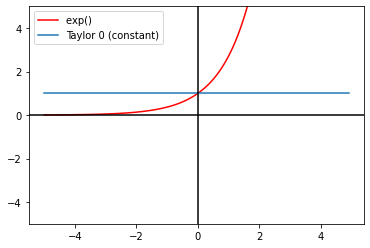

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp1 = [taylor(exp(x), 0, 1).subs(x,v) for v in values]
legends = ['exp() ','Taylor 0 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)


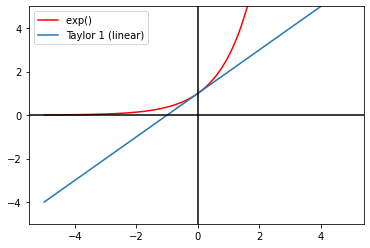

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp2 = [taylor(exp(x), 0, 2).subs(x,v) for v in values]
legends = ['exp() ','Taylor 1 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

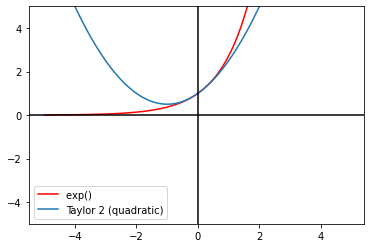

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp3 = [taylor(exp(x), 0, 3).subs(x,v) for v in values]
legends = ['exp() ','Taylor 2 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

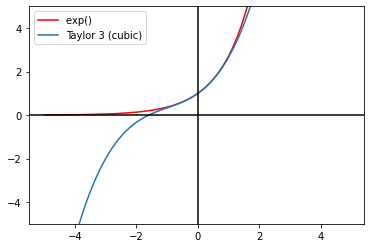

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp4 = [taylor(exp(x), 0, 4).subs(x,v) for v in values]
legends = ['exp() ','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

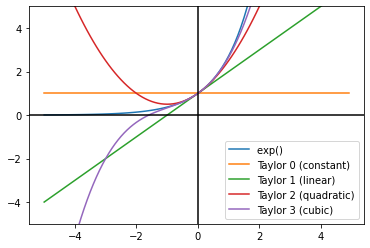

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp1 = [taylor(exp(x), 0, 1).subs(x,v) for v in values]
t_exp2 = [taylor(exp(x), 0, 2).subs(x,v) for v in values]
t_exp3 = [taylor(exp(x), 0, 3).subs(x,v) for v in values]
t_exp4 = [taylor(exp(x), 0, 4).subs(x,v) for v in values]
legends = ['exp() ','Taylor 0 (constant)','Taylor 1 (linear)','Taylor 2 (quadratic)','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_exp)
ax.plot(values,t_exp1)
ax.plot(values,t_exp2)
ax.plot(values,t_exp3)
ax.plot(values,t_exp4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()